#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,f_classif 
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data loading 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statistical analysis of the data

In [6]:
eda_df=df.copy()

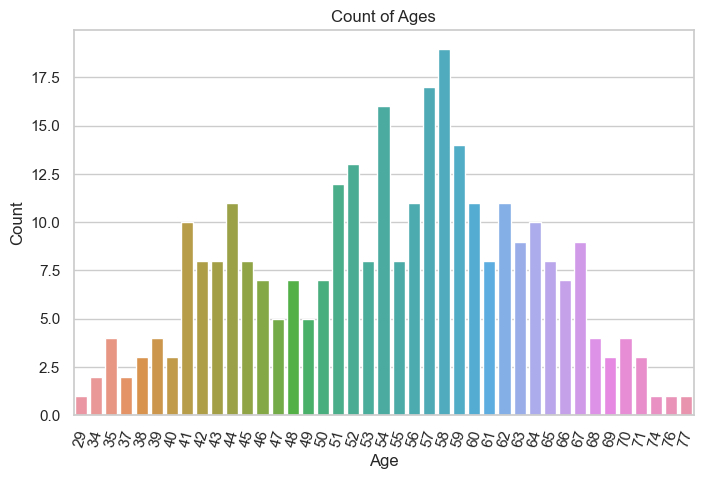

In [7]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="age", data=eda_df)

plt.title('Count of Ages')  # Optional: Set the title
plt.xlabel('Age')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [8]:
bins = [20, 30, 40, 50, 60, 70, eda_df['age'].max() + 1]  # Adjust the upper bound
labels = ['20-30', '30-40', '40-50', '50-60', '60-70','70-80']

eda_df['Age group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [9]:
eda_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target Age group  
0        0   0     1       1     60-70  
1        0   0     2       1     30-40  
2        2   0     2       1     40-50  
3        2   0     2       1     50-60  
4        2   0     2       1     50-60  
..     ...  ..   ...     ...       ...  
298      1   0     3       0     50-60  
299      1   0     3       0     40-50  
300      1   2     3       0     60-70  
301      1   1     3       0     50-60  
302      1   1     2       0     50-60  

[303 rows x 15 columns]

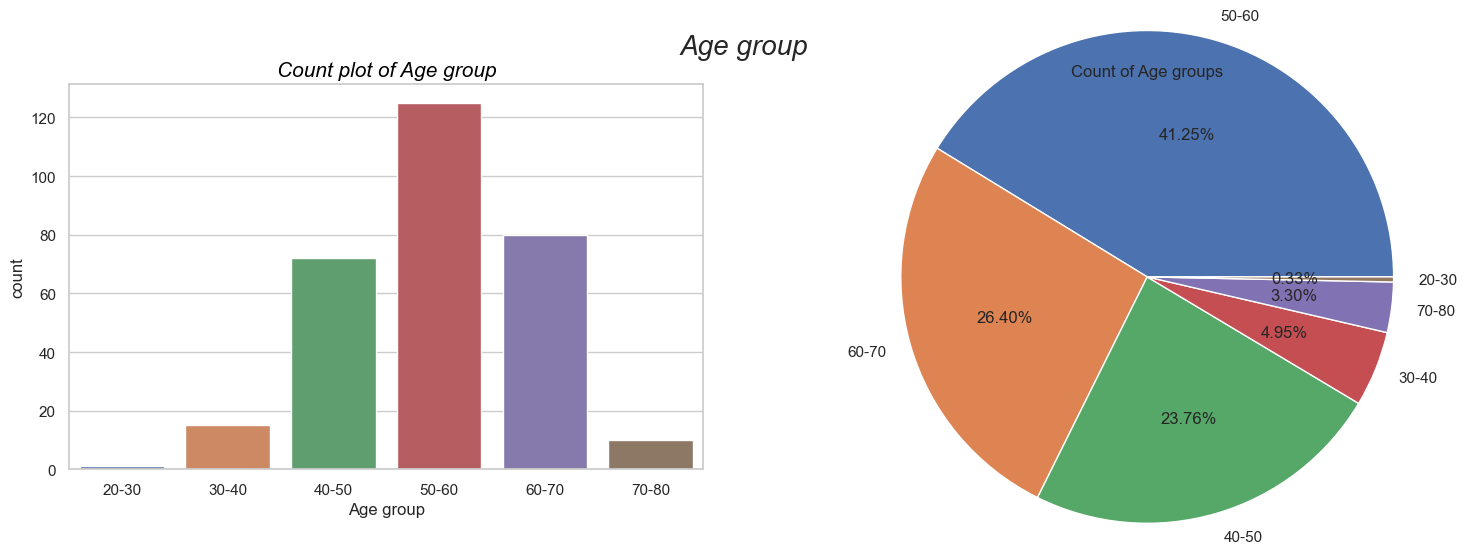

In [10]:
column = 'Age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=eda_df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(eda_df[column].value_counts().values,labels=eda_df[column].value_counts().index,radius=1.6,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

In [11]:
eda_df.groupby('Age group')['age'].count()

Age group
20-30      1
30-40     15
40-50     72
50-60    125
60-70     80
70-80     10
Name: age, dtype: int64

In [12]:
eda_df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [13]:
eda_df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

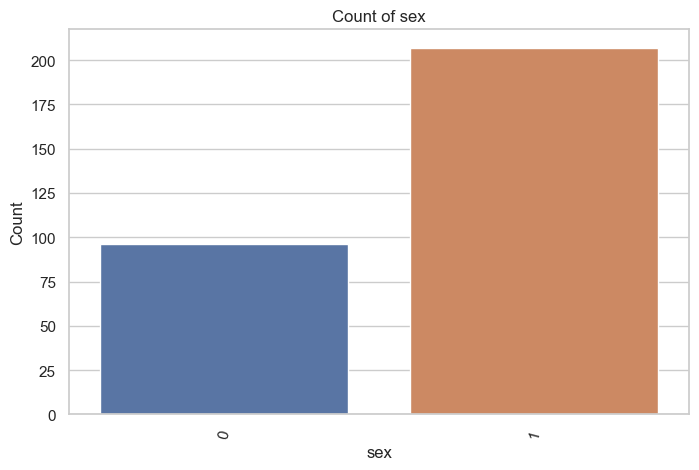

In [14]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="sex", data=eda_df)

plt.title('Count of sex')  # Optional: Set the title
plt.xlabel('sex')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [15]:
age_sex_counts = eda_df.groupby(['age', 'sex']).size().reset_index(name='count')
print(age_sex_counts)

    age  sex  count
0    29    1      1
1    34    0      1
2    34    1      1
3    35    0      1
4    35    1      3
..  ...  ...    ...
68   70    1      4
69   71    0      3
70   74    0      1
71   76    0      1
72   77    1      1

[73 rows x 3 columns]


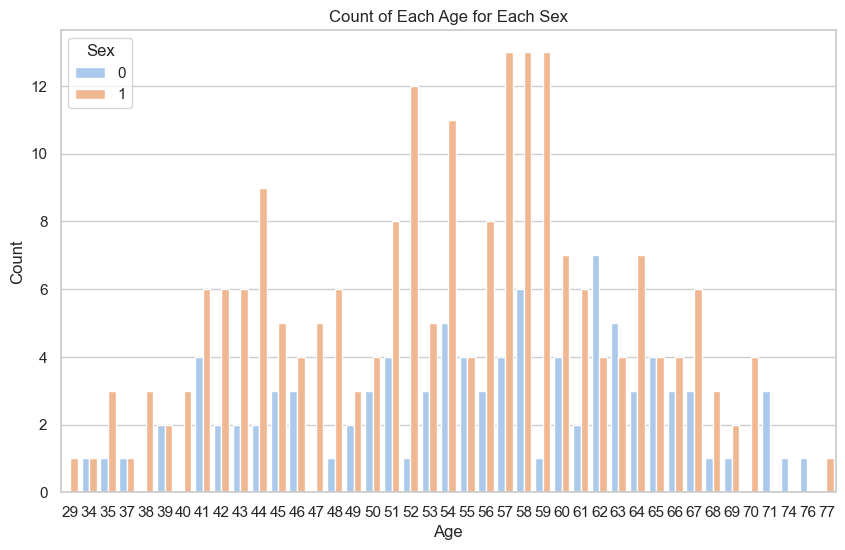

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', hue='sex', data=age_sex_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

In [17]:
eda_df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

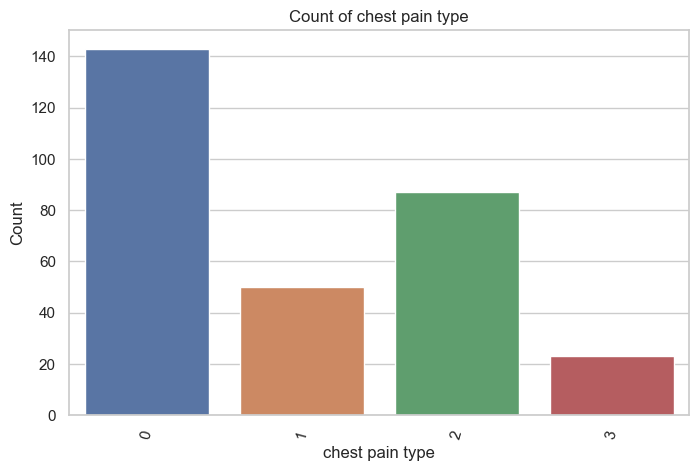

In [18]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="cp", data=eda_df)

plt.title('Count of chest pain type')  # Optional: Set the title
plt.xlabel('chest pain type')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [19]:
age_cp_counts = eda_df.groupby(['age', 'cp']).size().reset_index(name='count')
print(age_cp_counts)

     age  cp  count
0     29   1      1
1     34   1      1
2     34   3      1
3     35   0      3
4     35   1      1
..   ...  ..    ...
103   71   1      1
104   71   2      1
105   74   1      1
106   76   2      1
107   77   0      1

[108 rows x 3 columns]


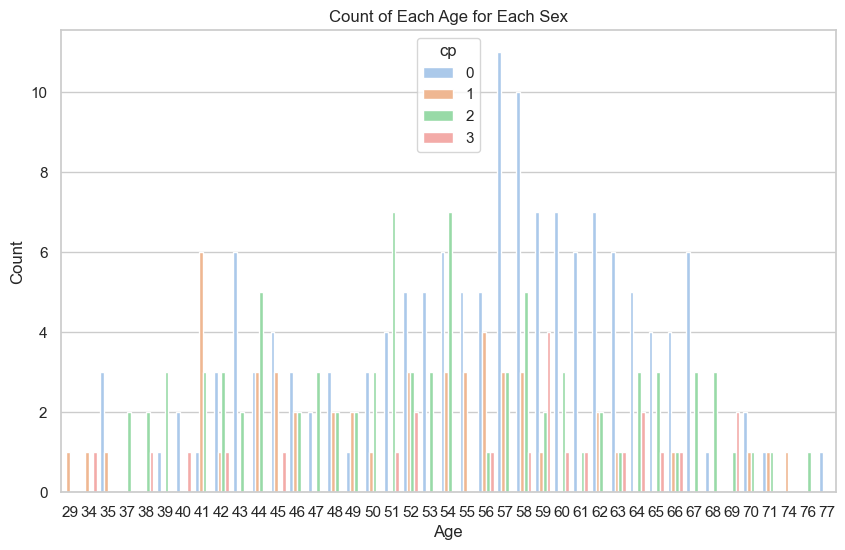

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', hue='cp', data=age_cp_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='cp')
plt.show()

In [21]:
sex_cp_counts = eda_df.groupby(['sex', 'cp']).size().reset_index(name='count')
print(sex_cp_counts)

   sex  cp  count
0    0   0     39
1    0   1     18
2    0   2     35
3    0   3      4
4    1   0    104
5    1   1     32
6    1   2     52
7    1   3     19


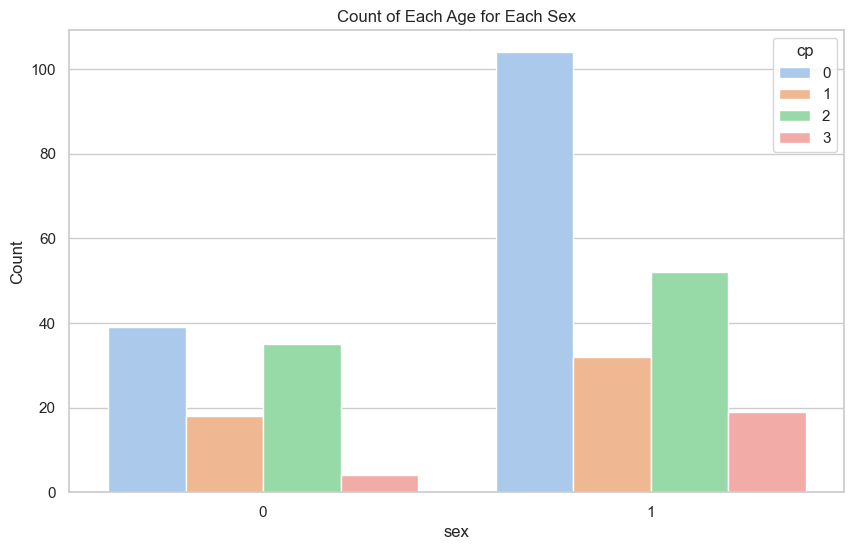

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='count', hue='cp', data=sex_cp_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='cp')
plt.show()

### univariant analysis

Summary for age:
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


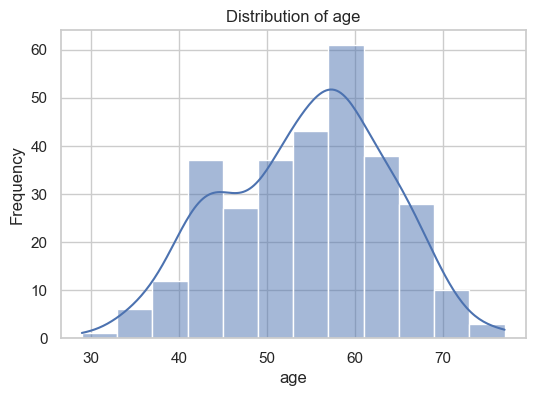

Summary for sex:
count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64


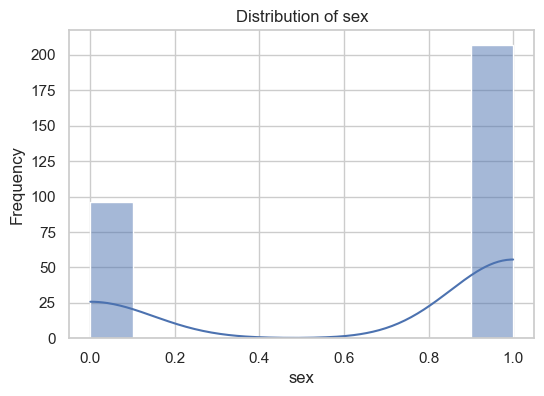

Summary for cp:
count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


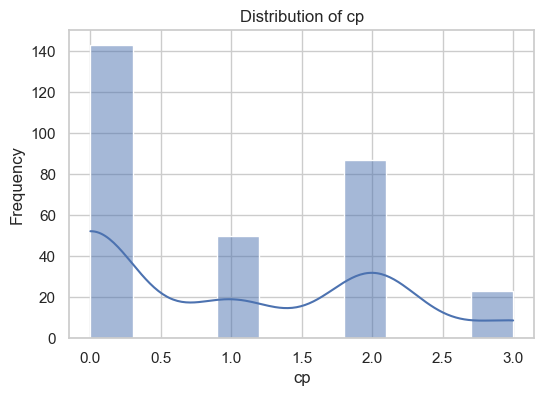

Summary for trestbps:
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


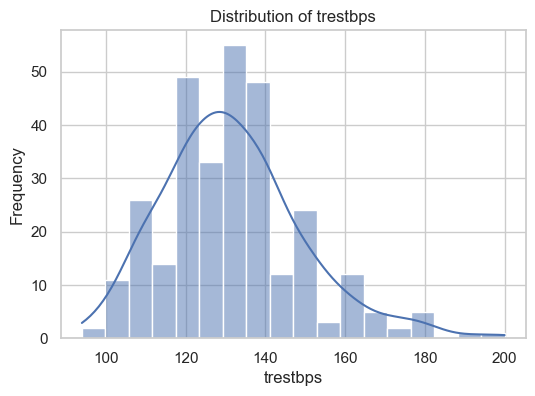

Summary for chol:
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


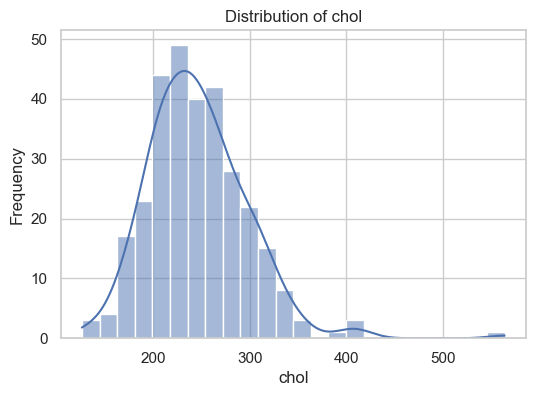

Summary for fbs:
count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64


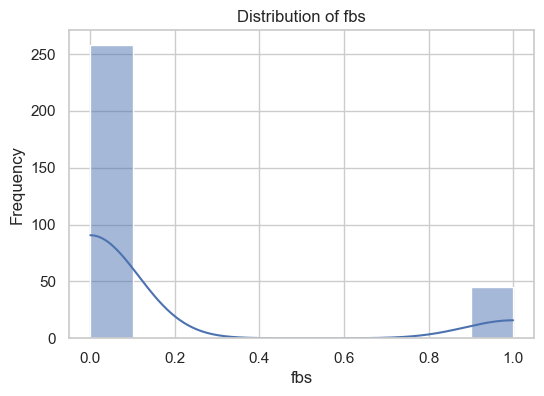

Summary for restecg:
count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64


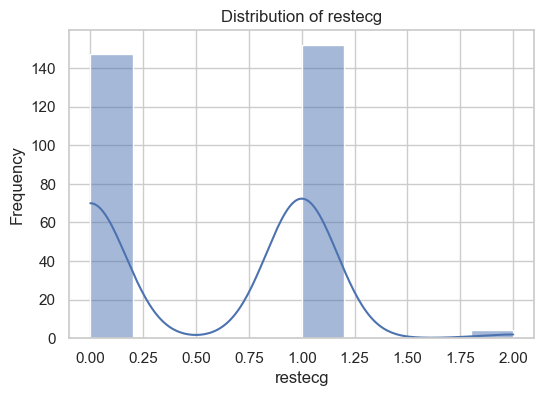

Summary for thalach:
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


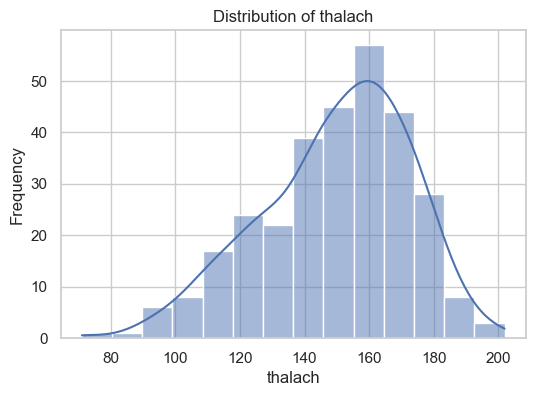

Summary for exang:
count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64


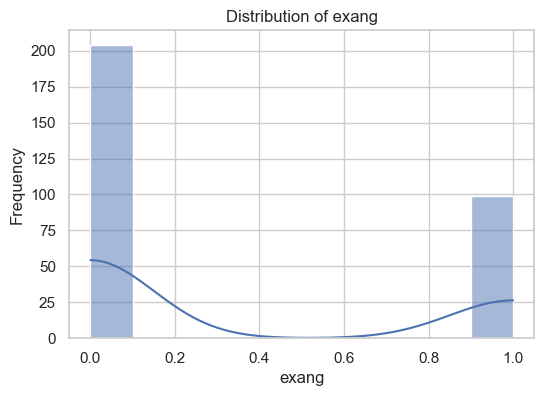

Summary for oldpeak:
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


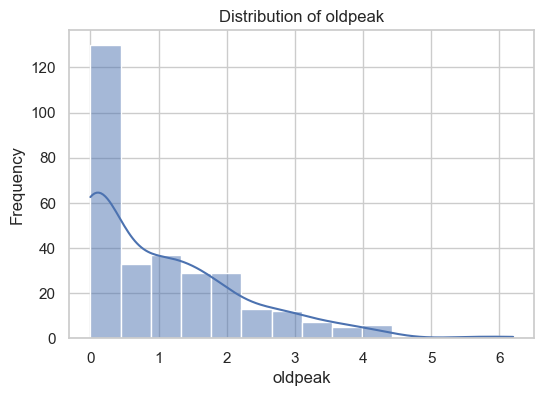

Summary for slope:
count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64


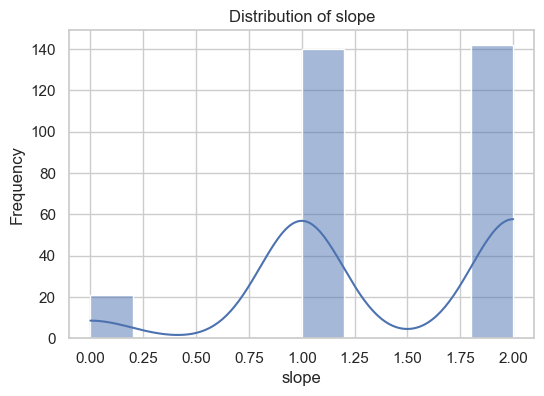

Summary for ca:
count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64


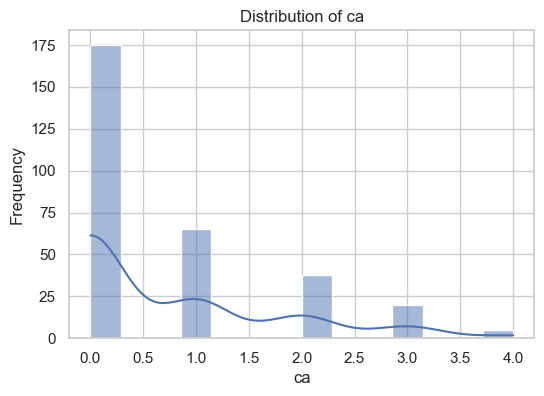

Summary for thal:
count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64


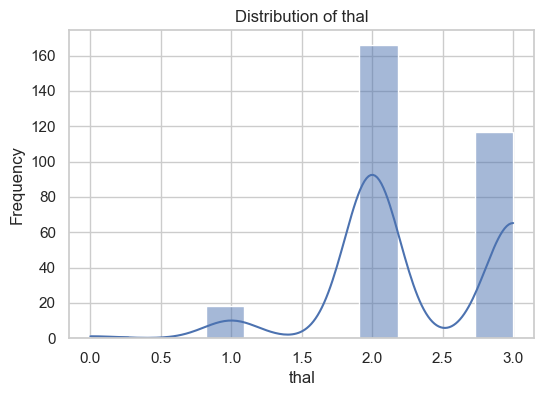

Summary for target:
count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64


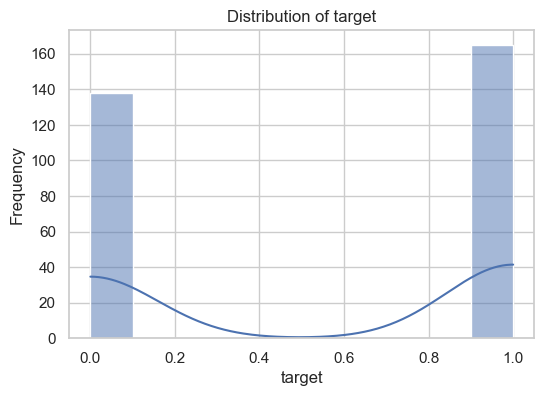

In [23]:
for column in eda_df.columns:
    if eda_df[column].dtype in [int, float]:  # Numeric columns
        print(f"Summary for {column}:")
        print(eda_df[column].describe())
        plt.figure(figsize=(6, 4))
        sns.histplot(eda_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

### bi variant analysis with respect to target

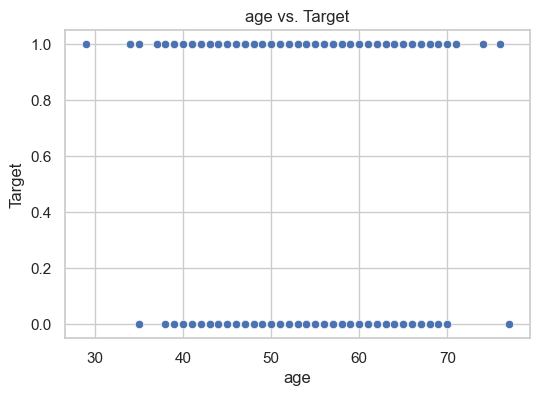

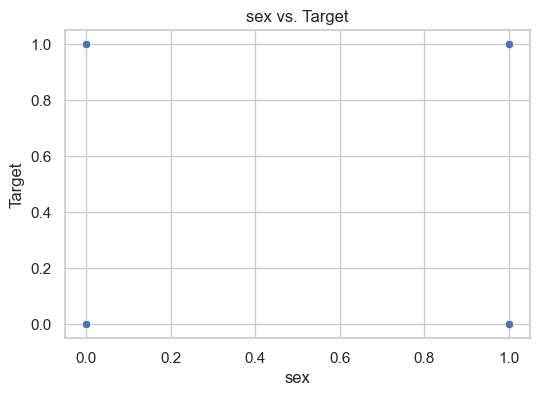

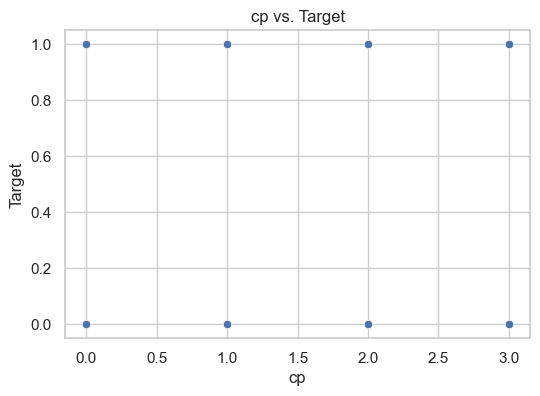

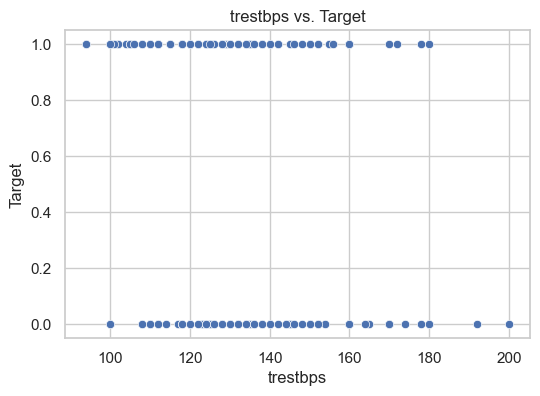

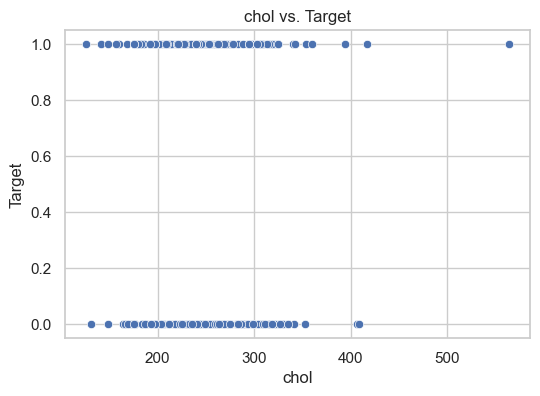

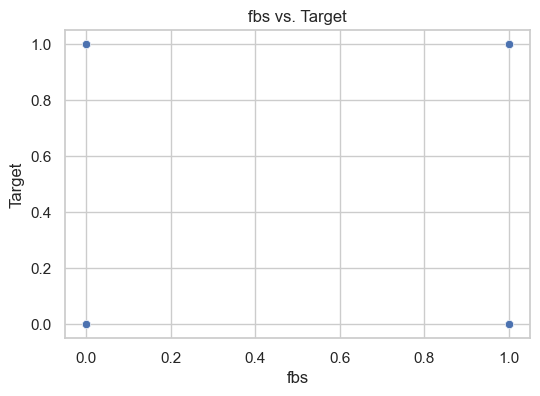

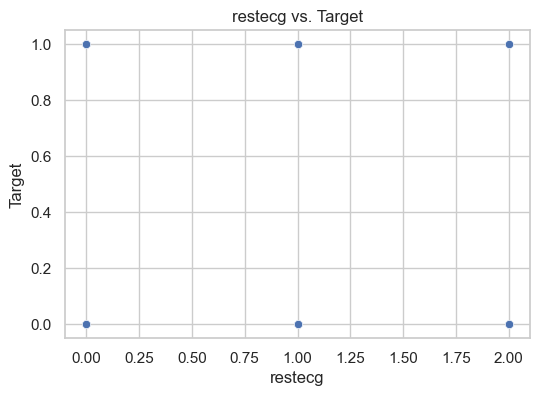

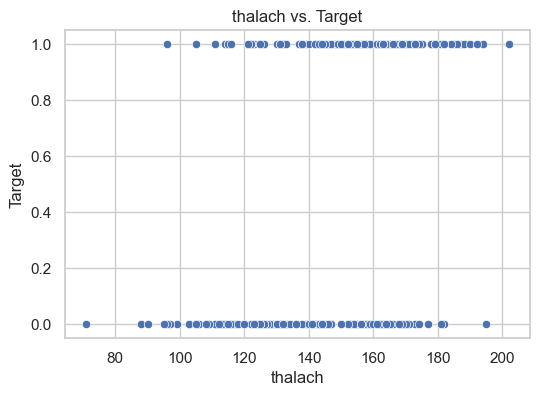

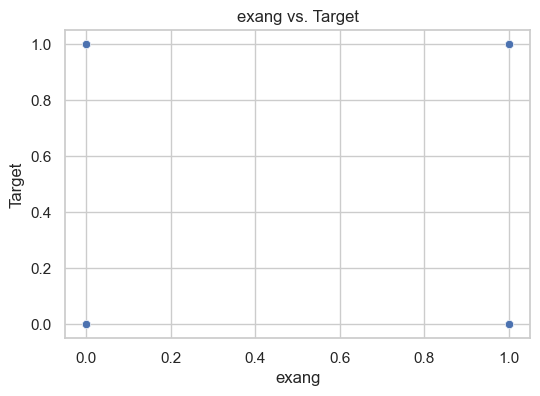

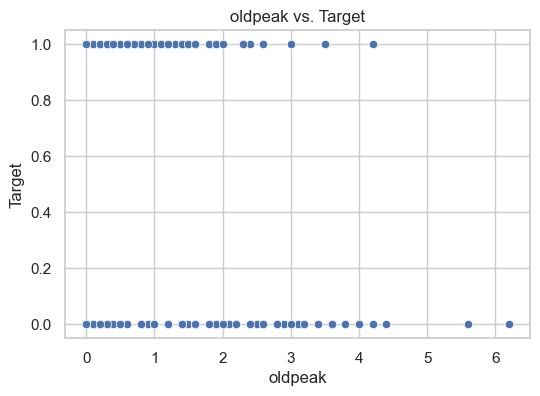

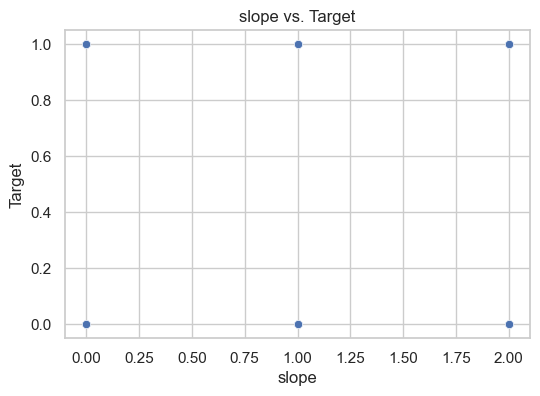

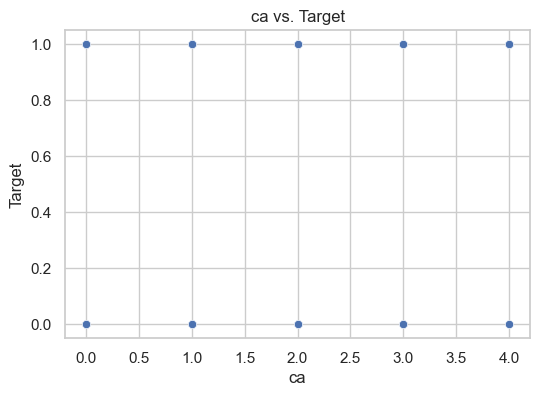

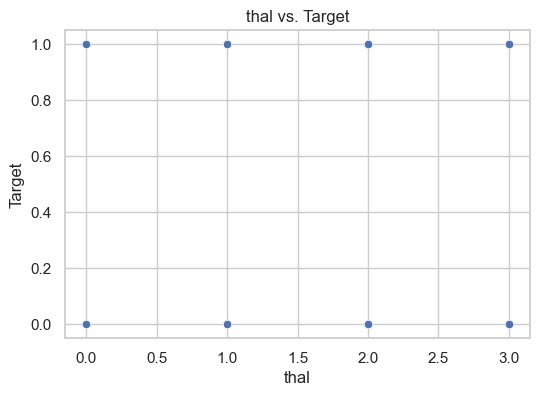

In [24]:
numeric_columns = eda_df.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    if column != 'target':  # Exclude target variable
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=column, y='target', data=eda_df)
        plt.title(f"{column} vs. Target")
        plt.xlabel(column)
        plt.ylabel("Target")
        plt.show()

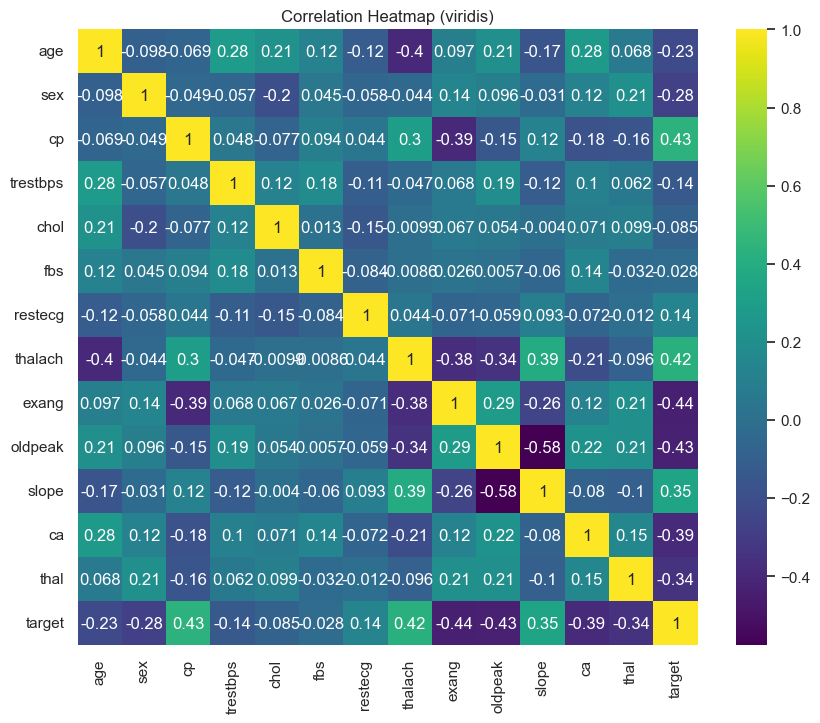

In [25]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Set the title
plt.title("Correlation Heatmap (viridis)")

# Show the plot
plt.show()

### scaling and removing outlier df data 

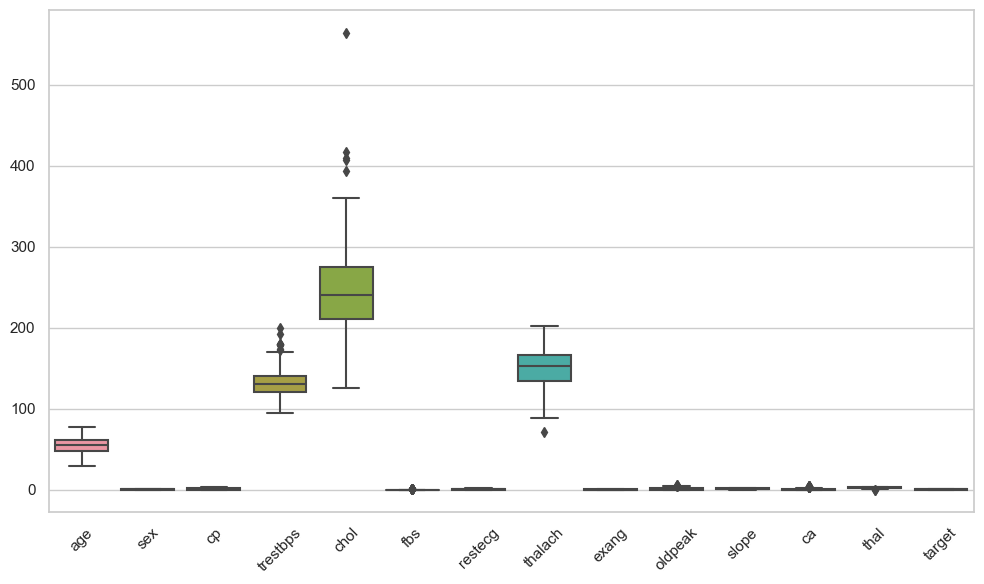

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  target  
0    0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873       1  
1    1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922       1  
2    0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922       1  
3    1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922       1  
4    0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922       1  
..        ...       ...       ...       ...       ...       ...     ...  
298 -1.165281  1.435481 -0.724323 -0.649113 -0.714429  1.123029       0  
299 -0.771706 -0.696631  0.138373 -0.649113 -0.714429  1.123029       0  
300 -0.378132 -0.696631  2.036303 -0.649113  1.244593  1.123029       0  
301 -1.515125  1.435481  0.138373 -0.649113  0.265082  1.123029       0  
302  1.064975 -0.696631 -0.896862 -0.649113  0.265082 -0.512922       0  

[303 rows x 14 columns]

In [26]:
# Creating box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming 'df' is your DataFrame
scaler = StandardScaler()

# Separating features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardizing the features
X_standardized = scaler.fit_transform(X)

# Creating a new DataFrame with standardized features
columns = X.columns  
standardized_df = pd.DataFrame(X_standardized, columns=columns)

# Adding the target_class back to the standardized DataFrame
standardized_df['target'] = y

# Displaying the resulting DataFrame with standardized features
standardized_df

In [27]:
standardized_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
# Extract columns except the target variable (assuming 'target_class' is the target column)
features = standardized_df.drop('target', axis=1)

# Calculate Q1 and Q3 for the features
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

# Calculate IQR for the features
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Find outliers for the features
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify rows without outliers for the features
no_outliers = ((features >= lower_bound) & (features <= upper_bound)).all(axis=1)

# Filter the DataFrame to remove outliers for the features
standardized_df = standardized_df[no_outliers]

In [29]:
standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    float64
 1   sex       227 non-null    float64
 2   cp        227 non-null    float64
 3   trestbps  227 non-null    float64
 4   chol      227 non-null    float64
 5   fbs       227 non-null    float64
 6   restecg   227 non-null    float64
 7   thalach   227 non-null    float64
 8   exang     227 non-null    float64
 9   oldpeak   227 non-null    float64
 10  slope     227 non-null    float64
 11  ca        227 non-null    float64
 12  thal      227 non-null    float64
 13  target    227 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 26.6 KB


### Doing PCA 

[0.24603711 0.12936149]


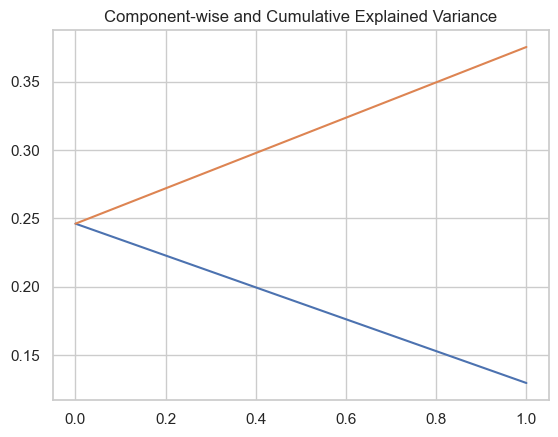

<Figure size 1000x600 with 0 Axes>

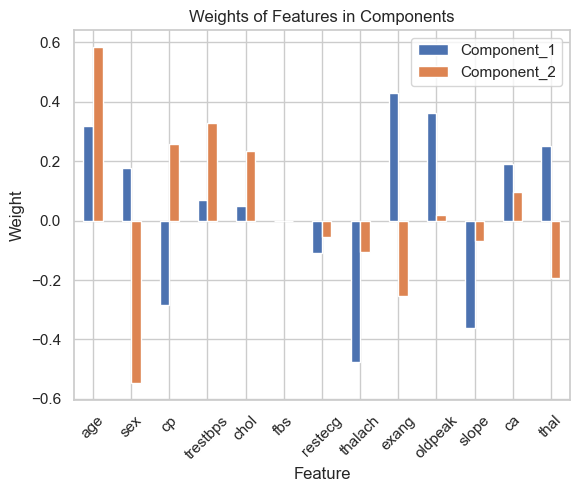

Weights of Features in Component 1:
exang       4.273598e-01
oldpeak     3.606757e-01
age         3.190078e-01
thal        2.504972e-01
ca          1.891467e-01
sex         1.775779e-01
trestbps    7.030222e-02
chol        4.791912e-02
fbs        -2.168404e-19
restecg    -1.095214e-01
cp         -2.829643e-01
slope      -3.600194e-01
thalach    -4.759570e-01
Name: Component_1, dtype: float64

Weights of Features in Component 2:
age         5.834427e-01
trestbps    3.293632e-01
cp          2.570997e-01
chol        2.341947e-01
ca          9.730643e-02
oldpeak     1.839573e-02
fbs         2.619991e-32
restecg    -5.524985e-02
slope      -6.949990e-02
thalach    -1.056802e-01
thal       -1.945724e-01
exang      -2.533680e-01
sex        -5.470423e-01
Name: Component_2, dtype: float64


In [52]:
X = standardized_df.drop('target', axis=1)

# Instantiate PCA
pca = PCA()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.values)  # Transforming data with selected components

# Variance explained by each of the 5 components
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
    
# Get the weights of each original feature in the principal components
weights = pca.components_

# Create a DataFrame to hold the weights and corresponding column names
weights_df = pd.DataFrame(weights, columns=X.columns, index=['Component_1', 'Component_2'])


plt.plot(range(2), pca.explained_variance_ratio_) 
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Component-wise and Cumulative Explained Variance")

# Plotting the weights for Component 1 and Component 2
plt.figure(figsize=(10, 6))
weights_df.T.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Weights of Features in Components')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Display the weights for each component
print("Weights of Features in Component 1:")
print(weights_df.loc['Component_1'].sort_values(ascending=False))

print("\nWeights of Features in Component 2:")
print(weights_df.loc['Component_2'].sort_values(ascending=False))

### conclusion

#### Component 1:
#### This component is characterized by notably positive weights for 'exang' (Exercise Induced Angina), 'oldpeak' (ST Depression Induced by Exercise Relative to Rest), 'age', and 'thal' (Thalassemia). Conversely, features like 'thalach' (Maximum Heart Rate Achieved), 'slope' (Slope of the Peak Exercise ST Segment), and 'cp' (Chest Pain) exhibit moderately negative weights. This implies that individuals scoring high in Component 1 might have higher chances of heart disease due to indicators such as exercise-induced angina, higher ST depression, older age, and specific types of thalassemia. However, a lower maximum heart rate achieved and certain types of chest pain might correlate with a decreased risk of heart disease in this component.

#### Component 2:
#### In this component, 'age' and 'sex' have the highest weights, with 'age' being substantially positive and 'sex' notably negative. Additionally, 'cp', 'trestbps' (Resting Blood Pressure), and 'chol' (Cholesterol) exhibit moderately positive weights. Conversely, 'thalach', 'exang', and 'thal' showcase negative weights. This suggests that individuals scoring high in Component 2 are likely older (positive association with age), possibly male (negative association with sex), and might have higher resting blood pressure, cholesterol levels, and certain types of chest pain. However, factors like maximum heart rate achieved, exercise-induced angina, and certain types of thalassemia might have a lower impact on this component